In [1]:
#Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading the dataset
dataset = pd.read_csv("C:\\Users\\sneka\\Downloads\\sales_data_2.csv")

In [3]:
#getting the first first rows of the dataset
dataset.head()

,Date,Firm bought from,Buying price,Quantity bought,Customer,Selling price,Quantity sold
0,2023-08-21,Vendor6,72.11,60,Customer7,91.58,44
1,2023-08-21,Vendor4,75.08,92,Customer7,83.71,17
2,2023-08-21,Vendor7,83.93,16,Customer2,103.76,15
3,2023-08-21,Vendor7,52.01,62,Customer3,64.53,7
4,2023-08-21,Vendor2,98.91,1,Customer5,140.92,1


In [4]:
dataset.shape

(70, 7)

In [5]:
dataset.columns

Index(['Date', 'Firm bought from', 'Buying price', 'Quantity bought',
       'Customer', 'Selling price', 'Quantity sold'],
      dtype='object')

In [6]:
#Checking for the null values in the dataset
dataset_null = dataset.isnull().sum()
dataset_null

Date                0
Firm bought from    0
Buying price        0
Quantity bought     0
Customer            0
Selling price       0
Quantity sold       0
dtype: int64

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              70 non-null     object 
 1   Firm bought from  70 non-null     object 
 2   Buying price      70 non-null     float64
 3   Quantity bought   70 non-null     int64  
 4   Customer          70 non-null     object 
 5   Selling price     70 non-null     float64
 6   Quantity sold     70 non-null     int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 4.0+ KB


In [8]:
# Calculating the profit from the dataset
dataset['Profit'] = (dataset['Selling price'] - dataset['Buying price']) * dataset['Quantity sold']

In [9]:
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset['Month'] = dataset['Date'].dt.month 
dataset['Year'] = dataset['Date'].dt.year
dataset['Day_of_Week'] = dataset['Date'].dt.day_name()

In [10]:
dataset.head()

,Date,Firm bought from,Buying price,Quantity bought,Customer,Selling price,Quantity sold,Profit,Month,Year,Day_of_Week
0,2023-08-21,Vendor6,72.11,60,Customer7,91.58,44,856.68,8,2023,Monday
1,2023-08-21,Vendor4,75.08,92,Customer7,83.71,17,146.71,8,2023,Monday
2,2023-08-21,Vendor7,83.93,16,Customer2,103.76,15,297.45,8,2023,Monday
3,2023-08-21,Vendor7,52.01,62,Customer3,64.53,7,87.64,8,2023,Monday
4,2023-08-21,Vendor2,98.91,1,Customer5,140.92,1,42.01,8,2023,Monday


In [11]:
dataset.columns

Index(['Date', 'Firm bought from', 'Buying price', 'Quantity bought',
       'Customer', 'Selling price', 'Quantity sold', 'Profit', 'Month', 'Year',
       'Day_of_Week'],
      dtype='object')

6. Can you calculate a 3-day average of the daily gross profit from the sales_data_2.csv

In [12]:
dataset['Daily_Gross_Profit'] = dataset['Profit']

In [13]:
# Calculate the 3-day average of daily gross profit
dataset['3-Day_Avg_Gross_Profit'] = dataset['Daily_Gross_Profit'].rolling(window=3).mean()

In [14]:
dataset[['Date', 'Daily_Gross_Profit', '3-Day_Avg_Gross_Profit']]

,Date,Daily_Gross_Profit,3-Day_Avg_Gross_Profit
0,2023-08-21,856.68,NaN
1,2023-08-21,146.71,NaN
2,2023-08-21,297.45,433.613333
3,2023-08-21,87.64,177.266667
4,2023-08-21,42.01,142.366667
...,...,...,...
65,2023-08-27,407.34,552.863333
66,2023-08-27,84.00,552.070000
67,2023-08-27,947.84,479.726667
68,2023-08-27,126.44,386.093333


8. Can you optimize the sales process to ensure gross margin is maximized?
    1. Would you fire any vendor?
    2. Would you let go of any customer?

In [60]:
# Set a threshold for vendor and customer evaluation
vendor_threshold = 50000  
customer_threshold = 10000  

# Identify vendors with gross profit below the threshold
underperforming_vendors = dataset.groupby('Firm bought from')['Profit'].sum()[dataset.groupby('Firm bought from')['Profit'].sum() < vendor_threshold]

# Identify customers with gross profit below the threshold
underperforming_customers = dataset.groupby('Customer')['Profit'].sum()[dataset.groupby('Customer')['Profit'].sum() < customer_threshold]


In [62]:
customerAvgProfit = dataset.groupby('Customer')['Profit'].mean()
underperform_customers = customerAvgProfit[customerAvgProfit < 200]
underperform_customers

Customer
Customer3    150.721429
Customer5    187.897143
Name: Profit, dtype: float64

In [61]:
# Decide whether to fire any vendor or let go of any customer based on your business criteria

# Print the results
print("Underperforming Vendors:")
print(underperforming_vendors)

print("\nUnderperforming Customers:")
print(underperforming_customers)

Underperforming Vendors:
Firm bought from
Vendor1     1555.59
Vendor10    3040.62
Vendor2     1296.98
Vendor3     6370.67
Vendor4     6903.31
Vendor5     1616.14
Vendor6     1217.95
Vendor7     4961.05
Vendor8      253.74
Vendor9     4266.70
Name: Profit, dtype: float64

Underperforming Customers:
Customer
Customer1     5310.57
Customer10    3692.44
Customer2     4215.67
Customer3     1055.05
Customer4     3337.37
Customer5     1315.28
Customer6     1930.76
Customer7     2197.62
Customer8     6498.91
Customer9     1929.08
Name: Profit, dtype: float64


7. Additionally, provide insights into how this 3-day trend changes over the time period covered in the dataset.

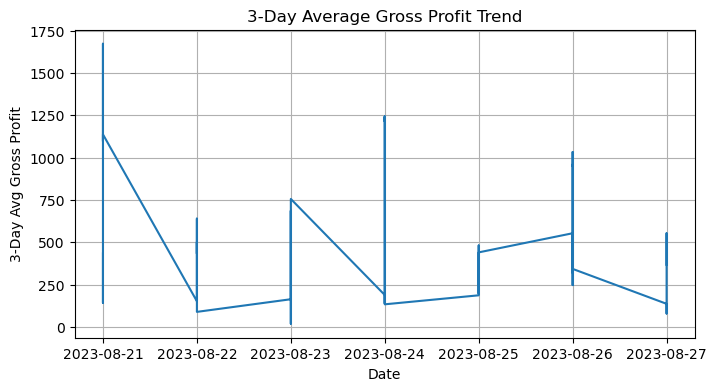

In [15]:
#Visualize the 3-day trend changes

plt.figure(figsize=(8, 4))
plt.plot(dataset['Date'], dataset['3-Day_Avg_Gross_Profit'], label='3-Day Avg Gross Profit')
plt.title('3-Day Average Gross Profit Trend')
plt.xlabel('Date')
plt.ylabel('3-Day Avg Gross Profit')
plt.grid(True)
plt.show()

In [16]:
# Describe insights

# print("Insights:")
# print("1. Increasing Trend:", dataset['3-Day_Avg_Gross_Profit'][dataset['3-Day_Avg_Gross_Profit'].diff() > 0])
# print("2. Decreasing Trend:", dataset['3-Day_Avg_Gross_Profit'][dataset['3-Day_Avg_Gross_Profit'].diff() < 0])
# print("3. No Clear Trend:", dataset['3-Day_Avg_Gross_Profit'][dataset['3-Day_Avg_Gross_Profit'].diff() == 0])
# plt.show()

9. To ensure competitive pricing, Ram wants to benchmark their buying and selling prices against the market. Could you calculate the 25th, 50th (median), and 75th percentiles for both buying and selling prices

In [17]:
#quartiles

In [18]:
# Calculate the percentiles for buying price
buying_percentiles = dataset['Buying price'].quantile([0.25, 0.5, 0.75])
buying_percentiles 

0.25    29.90
0.50    60.76
0.75    78.32
Name: Buying price, dtype: float64

In [19]:
# Calculate the percentiles for selling price
selling_percentiles = dataset['Selling price'].quantile([0.25, 0.5, 0.75])
selling_percentiles

0.25     38.9750
0.50     78.9900
0.75    103.3975
Name: Selling price, dtype: float64

10. Additionally, analyze how often the Sapota’s prices fall below the 25th percentile or above the 75th percentile, potentially indicating they are buying at a high price or selling at a low price relative to their own transaction history

In [20]:
# Calculate the 25th and 75th percentiles for buying and selling prices
buying_percentiles = dataset['Buying price'].quantile([0.25, 0.75])
selling_percentiles = dataset['Selling price'].quantile([0.25, 0.75])

In [21]:
# Count how many times prices fall below the 25th percentile or above the 75th percentile
buying_below_25th = (dataset['Buying price'] < buying_percentiles[0.25]).sum()
buying_below_25th


18

In [22]:
buying_above_75th = (dataset['Buying price'] > buying_percentiles[0.75]).sum()
buying_above_75th

18

In [23]:
selling_below_25th = (dataset['Selling price'] < selling_percentiles[0.25]).sum()
selling_below_25th

18

In [25]:
selling_above_75th = (dataset['Selling price'] > selling_percentiles[0.75]).sum()
selling_above_75th

18

11. Bharath says that Vendor 4 has to be honored.  What impact does it have on your optimal gross margin

In [28]:
# Calculate the optimal gross margin without considering Vendor 4
optimal_gross_margin_without_vendor4 = (dataset['Selling price'] * dataset['Quantity sold'] - dataset['Buying price'] * dataset['Quantity bought'])

In [29]:
optimal_gross_margin_without_vendor4

0     -297.08
1    -5484.29
2      213.52
3    -2772.91
4       42.01
       ...   
65    -240.86
66    -715.11
67   -2153.86
68   -1190.40
69   -1324.84
Length: 70, dtype: float64

In [40]:
selling = dataset['Selling price'] * dataset['Quantity sold']
selling

0     4029.52
1     1423.07
2     1556.40
3      451.71
4      140.92
       ...   
65    1574.10
66     527.95
67    2973.44
68     502.68
69      82.16
Length: 70, dtype: float64

In [42]:
buying = dataset['Buying price'] * dataset['Quantity bought']
buying

0     4326.60
1     6907.36
2     1342.88
3     3224.62
4       98.91
       ...   
65    1814.96
66    1243.06
67    5127.30
68    1693.08
69    1407.00
Length: 70, dtype: float64

In [43]:
optimal_gross_margin_without_vendor4 = sum(selling - buying)


In [44]:
optimal_gross_margin_without_vendor4

-66033.43000000001

In [33]:
#Getting on the vendor4 data

vendor4_data = dataset[dataset['Firm bought from']=="Vendor4"]
vendor4_data

,Date,Firm bought from,Buying price,Quantity bought,Customer,Selling price,Quantity sold,Profit,Month,Year,Day_of_Week,Daily_Gross_Profit,3-Day_Avg_Gross_Profit
1,2023-08-21,Vendor4,75.08,92,Customer7,83.71,17,146.71,8,2023,Monday,146.71,NaN
29,2023-08-23,Vendor4,50.49,43,Customer10,59.99,41,389.50,8,2023,Wednesday,389.50,755.750000
34,2023-08-24,Vendor4,99.23,95,Customer1,131.98,92,3013.00,8,2023,Thursday,3013.00,1242.630000
49,2023-08-25,Vendor4,17.85,80,Customer5,20.47,20,52.40,8,2023,Friday,52.40,440.043333
54,2023-08-26,Vendor4,82.77,66,Customer8,124.13,65,2688.40,8,2023,Saturday,2688.40,959.096667
59,2023-08-26,Vendor4,28.90,88,Customer8,36.83,11,87.23,8,2023,Saturday,87.23,342.363333
62,2023-08-27,Vendor4,68.27,22,Customer4,100.62,1,32.35,8,2023,Sunday,32.35,81.236667
63,2023-08-27,Vendor4,83.76,34,Customer3,96.10,7,86.38,8,2023,Sunday,86.38,78.670000
65,2023-08-27,Vendor4,64.82,28,Customer6,87.45,18,407.34,8,2023,Sunday,407.34,552.863333


In [36]:
gross_margin_with_vendor4 = sum((vendor4_data['Selling price'] * vendor4_data['Quantity sold']) -
    (vendor4_data['Buying price'] * vendor4_data['Quantity bought']))


In [37]:
gross_margin_with_vendor4

-6848.82

12. 2. Which vendor should we have a strategic tie up so that we source only from them (the goal here is to have the highest gross margin)
    - What’s the theoretical max margin the firm could have from that branch?

In [65]:
dataset['Gross Margin'] = (dataset['Selling price'].sum() - dataset['Buying price'].sum()) / dataset['Selling price'].sum()
vendor = dataset.groupby('Firm bought from')['Gross Margin'].mean()
best_vendor = vendor.idxmax()
print("Best Vendor for Tie-Up:", best_vendor)
print("Average Gross Margin:", vendor[best_vendor])

Best Vendor for Tie-Up: Vendor1
Average Gross Margin: 0.22280869839515818


13. Given this is the ground truth, what is the price elasticity of Sapota for that branch? (If you increase by Rs.1, how much sales will go up/down and if you decrease price by Rs. 1, how much sales will go up/down) 

In [64]:
total_revenue = (dataset['Selling price'] * dataset['Quantity sold']).sum()
dataset['Selling price'] += 1
revenue_increase = (dataset['Selling price'] * dataset['Quantity sold']).sum()
sales_increase = revenue_increase - total_revenue
dataset['Selling price'] -= 2
revenue_decrease = (dataset['Selling price'] * dataset['Quantity sold']).sum()
sales_decrease = revenue_decrease - total_revenue
print("Sales Increase by Rs.1 = Rs.", sales_increase)
print("Sales Decrease by Rs.1 = Rs.", sales_decrease)

Sales Increase by Re.1 = Rs. 1697.0
Sales Decrease by Re.1 = Rs. -1697.0
